In [1]:
import yt
from yt.units import *
from header import *

/Users/acharyya/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /Users/acharyya/.config/yt/ytrc is deprecated in favor of /Users/acharyya/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:
ds = yt.load('/Users/acharyya/models/simulation_output/foggie/halo_008508/nref11c_nref9f/RD0030/RD0030')

yt : [INFO     ] 2023-01-24 11:17:46,699 Parameters: current_time              = 342.59335094489
yt : [INFO     ] 2023-01-24 11:17:46,700 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-01-24 11:17:46,700 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-01-24 11:17:46,701 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-01-24 11:17:46,702 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-01-24 11:17:46,702 Parameters: current_redshift          = 0.69999998985822
yt : [INFO     ] 2023-01-24 11:17:46,703 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-01-24 11:17:46,703 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-01-24 11:17:46,704 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-01-24 11:17:46,704 Parameters: hubble_constant           = 0.695


In [3]:
galrad = 10 # kpc
thisfield = ('gas', 'density')
rho_cut = 1e-25 # g/cm^3
proj = 'x'

In [4]:
center = ds.arr([41631.97617789, 40636.582029  , 42801.22612753], 'kpc')
ds.halo_center_kpc = center
x_width = 2 * galrad * kpc
box = ds.r[center[0] - x_width / 2.: center[0] + x_width / 2., center[1] - x_width / 2.: center[1] + x_width / 2., center[2] - x_width / 2.: center[2] + x_width / 2.]

Parsing Hierarchy : 100%|██████████| 5804/5804 [00:00<00:00, 8175.92it/s]
yt : [INFO     ] 2023-01-24 11:17:47,734 Gathering a field list (this may take a moment.)


In [5]:
ad = box.ds.all_data()
cgm = ad.cut_region(['obj["gas", "density"] < %.1E' % rho_cut])
ism = ad.cut_region(['obj["gas", "density"] > %.1E' % rho_cut])
#ism = ad.cut_region(['obj["gas", "density"] < %.1E' % 1e-25])

yt : [INFO     ] 2023-01-24 11:17:51,383 Projection completed
yt : [INFO     ] 2023-01-24 11:17:51,384 xlim = 0.480003 0.480239
yt : [INFO     ] 2023-01-24 11:17:51,385 ylim = 0.505578 0.505815
yt : [INFO     ] 2023-01-24 11:17:51,385 xlim = 0.480003 0.480239
yt : [INFO     ] 2023-01-24 11:17:51,386 ylim = 0.505578 0.505815
yt : [INFO     ] 2023-01-24 11:17:51,387 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



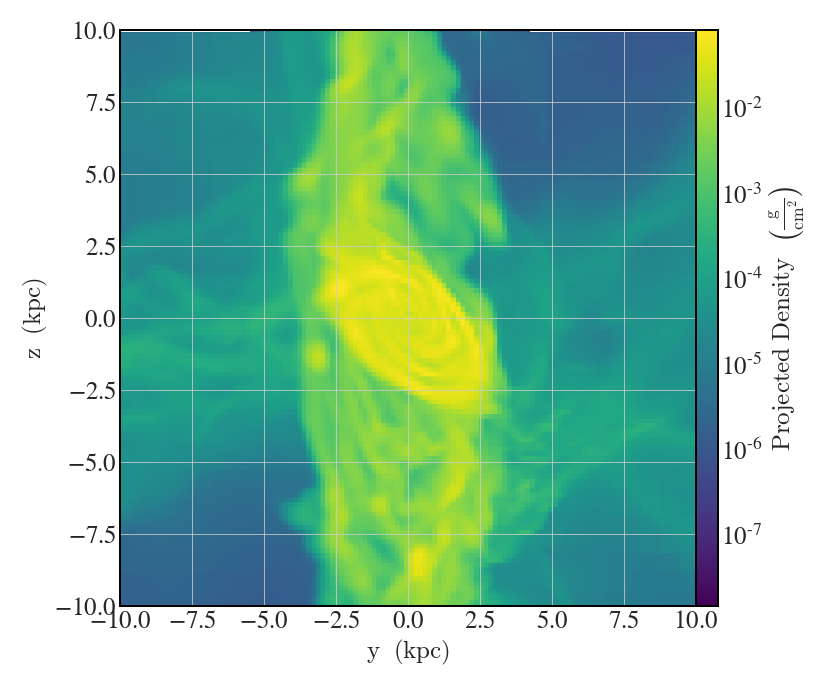

In [6]:
prj = yt.ProjectionPlot(ds, 'x', thisfield, center=box.center, data_source=box, width=2 * galrad * kpc, fontsize=25)
prj.set_cmap(thisfield, cmap='viridis')

yt : [INFO     ] 2023-01-24 11:17:53,235 xlim = 0.480003 0.480239
yt : [INFO     ] 2023-01-24 11:17:53,235 ylim = 0.505578 0.505815
yt : [INFO     ] 2023-01-24 11:17:53,236 xlim = 0.480003 0.480239
yt : [INFO     ] 2023-01-24 11:17:53,237 ylim = 0.505578 0.505815
yt : [INFO     ] 2023-01-24 11:17:53,238 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



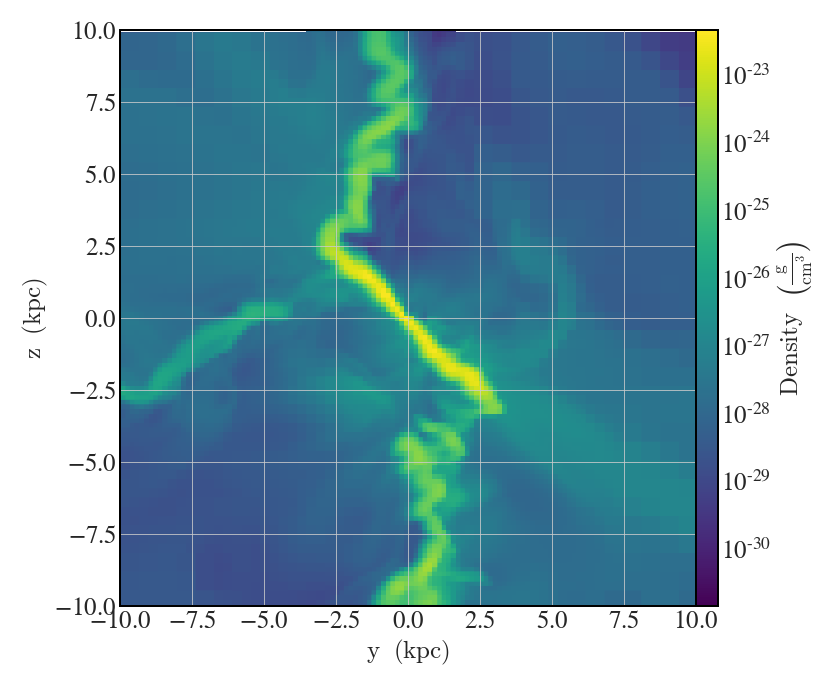

In [7]:
prj = yt.SlicePlot(ds, proj, thisfield, center=box.center + ds.arr([0, 0, 0], 'kpc'), data_source=box, width=2 * galrad * kpc, fontsize=25)
prj.set_cmap(thisfield, cmap='viridis')

In [ ]:
prj = yt.SlicePlot(ds, proj, thisfield, center=box.center, data_source=ism, width=2 * galrad * kpc, fontsize=25)
prj.set_cmap(thisfield, cmap='Blue')

In [9]:
prj.save('/Users/acharyya/Work/astro/foggie_outputs/plots_halo_008508/nref11c_nref9f/figs/RD0030/RD0030_ism_slice_upto10.0kpc_pynb.png')

yt : [INFO     ] 2023-01-24 11:18:42,829 Saving plot /Users/acharyya/Work/astro/foggie_outputs/plots_halo_008508/nref11c_nref9f/figs/RD0030/RD0030_ism_slice_upto10.0kpc_pynb.png


['/Users/acharyya/Work/astro/foggie_outputs/plots_halo_008508/nref11c_nref9f/figs/RD0030/RD0030_ism_slice_upto10.0kpc_pynb.png']

In [ ]:
prj2 = yt.SlicePlot(ds, proj, thisfield, center=box.center, data_source=cgm, width=2 * galrad * kpc, fontsize=25)
prj2.set_cmap(thisfield, cmap='Reds')

In [ ]:
prj2.save('/Users/acharyya/Work/astro/foggie_outputs/plots_halo_008508/nref11c_nref9f/figs/RD0030/RD0030_cgm_slice_upto10.0kpc_pynb.png')